In [1]:
from tensorflow.keras.layers import Flatten, Dense, Reshape, Input
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.datasets import mnist
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255
x_test = x_test / 255

img_width = x_train[0].shape[0]
img_height = x_train[0].shape[1]

In [9]:
latent_dim = 2
input_img = Input(shape=(img_width,img_height))
x = Flatten()(input_img)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
encoded = Dense(latent_dim, activation='relu')(x)
x = Dense(64, activation='relu')(encoded)
x = Dense(128, activation='relu')(x)
x = Dense(img_width * img_height, activation='sigmoid')(x)
decoded = Reshape([img_width, img_height])(x)

autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)
decoder_input = Input(shape=(latent_dim, ))
dec_1 = autoencoder.layers[5]
dec_2 = autoencoder.layers[6]
dec_3 = autoencoder.layers[7]
dec_4 = autoencoder.layers[8]

decoder = Model(decoder_input, dec_4(dec_3(dec_2(dec_1(decoder_input)))))

In [10]:
stop = EarlyStopping(restore_best_weights=True, patience=5)

autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(x_train, x_train, epochs=100, validation_split = .2, callbacks=[stop])

Epoch 1/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0570 - val_loss: 0.0496
Epoch 2/100
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0479 - val_loss: 0.0456
Epoch 3/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0450 - val_loss: 0.0435
Epoch 4/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0432 - val_loss: 0.0421
Epoch 5/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0420 - val_loss: 0.0412
Epoch 6/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0412 - val_loss: 0.0406
Epoch 7/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0406 - val_loss: 0.0401
Epoch 8/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0402 - val_loss: 0.0399
Epoch 9/100
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0398 - val_loss: 0.0396
Epoch 10/100
1500/1500 [==============================] - 2s 1ms/step - l

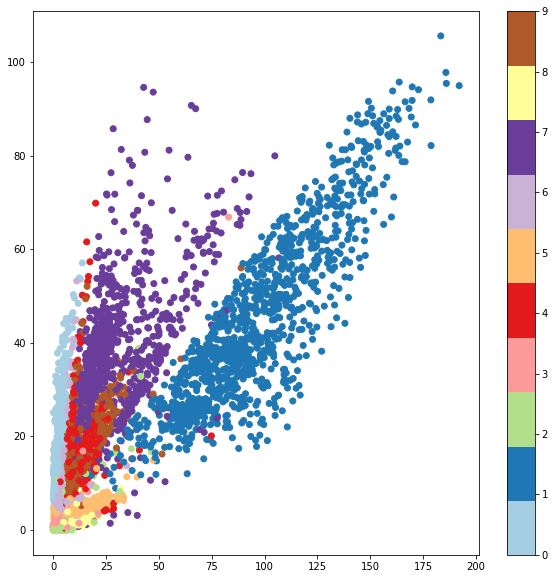

In [11]:
z = encoder.predict(x_test)
plt.figure(figsize=(10, 10))
plt.scatter(z[:, 0], z[:, 1] , c=y_test, cmap=plt.cm.get_cmap('Paired', 10))
plt.colorbar()

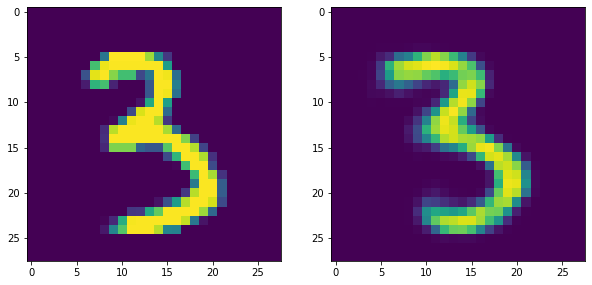

In [37]:
n = 32
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(x_test[n])
plt.subplot(1, 2, 2)
plt.imshow(autoencoder.predict(x_test[n].reshape(1, 28, 28)).reshape(28, 28))